# Bibliotecas

In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

import json

# Datasets

<h1>Application Record</h1>
<hr>

<tbody>
<tr>
    <td style="text-align: center;font-weight: bold;">Coluna</td>
    <td style="text-align: center;font-weight: bold;"><strong>Explicação</strong></td>
    <td style="text-align: center;font-weight: bold;"><strong>Observações</strong></td>
</tr>
<tr>
    <td style="text-align: left;"><code>ID</code></td>
    <td style="text-align: left;">Número do cliente</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>CODE_GENDER</code></td>
    <td style="text-align: left;">Gênero</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>FLAG_OWN_CAR</code></td>
    <td style="text-align: left;">Tem carro?</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>FLAG_OWN_REALTY</code></td>
    <td style="text-align: left;">Há uma propriedade?</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>CNT_CHILDREN</code></td>
    <td style="text-align: left;">Número de filhos</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>AMT_INCOME_TOTAL</code></td>
    <td style="text-align: left;">Renda anual</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>NAME_INCOME_TYPE</code></td>
    <td style="text-align: left;">Categoria de renda</td>
    <td></td>
</tr>
    <tr>
    <td style="text-align: left;"><code>NAME_EDUCATION_TYPE</code></td>
    <td style="text-align: left;">Escolaridade</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>NAME_FAMILY_STATUS</code></td>
    <td style="text-align: left;">Estado Civil</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>NAME_HOUSING_TYPE</code></td>
    <td style="text-align: left;">Modo de viver</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>DAYS_BIRTH</code></td>
    <td style="text-align: left;">nascimento</td>
    <td style="text-align: left;">Contagem regressiva a partir do dia atual (0), -1 significa ontem</td>
</tr>
<tr>
    <td style="text-align: left;"><code>DAYS_EMPLOYED</code></td>
    <td style="text-align: left;">Data de início no emprego</td>
    <td style="text-align: left;">Contagem regressiva a partir do dia atual(0). Se positivo, significa que a pessoa atualmente está desempregada.</td>
</tr>
<tr>
    <td style="text-align: left;"><code>FLAG_MOBIL</code></td>
    <td style="text-align: left;">Tem um telefone celular?</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>FLAG_WORK_PHONE</code></td>
    <td style="text-align: left;">Tem um telefone de trabalho?</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>FLAG_PHONE</code></td>
    <td style="text-align: left;">Tem telefone?</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>FLAG_EMAIL</code></td>
    <td style="text-align: left;">Tem email?</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>OCCUPATION_TYPE</code></td>
    <td style="text-align: left;">Ocupação</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>CNT_FAM_MEMBERS</code></td>
    <td style="text-align: left;">Tamanho da família</td>
    <td></td>
</tr>
</tbody>



In [5]:
df_application_record = pd.read_csv("../datasets/application_record.csv")
print(f"Linhas: {df_application_record.shape[0]}\nColunas: {df_application_record.shape[1]}")

Linhas: 438557
Colunas: 18


<h1>Credit Record</h1>
<hr>

<tbody>
<tr>
    <td style="text-align: center;font-weight: bold;">Coluna</td>
    <td style="text-align: center;font-weight: bold;"><strong>Explicação</strong></td>
    <td style="text-align: center;font-weight: bold;"><strong>Observações</strong></td>
</tr>
<tr>
    <td style="text-align: left;"><code>ID</code></td>
    <td style="text-align: left;">Número do cliente</td>
    <td></td>
</tr>
<tr>
    <td style="text-align: left;"><code>MONTHS_BALANCE</code></td>
    <td style="text-align: left;">Mês de registro</td>
    <td style="text-align: left;">O mês dos dados extraídos é o ponto de partida, para trás, 0 é o mês atual, -1 é o mês anterior e assim por diante</td>
</tr>
<tr>
    <td style="text-align: left;"><code>STATUS</code></td>
    <td style="text-align: left;">Status</td>
    <td style="text-align: left;">
        <ul>
            <li>0: 1-29 dias de atraso</li>
            <li>1: 30-59 dias de atraso</li>
            <li>2: 60-89 dias de atraso</li>
            <li>3: 90-119 dias de atraso</li>
            <li>4: 120-149 dias de atraso</li>
            <li>5: Dívidas vencidas ou incobráveis, baixas há mais de 150 dias</li>
            <li>C: Pagou naquele mês</li>
            <li>X: Sem empréstimo no mês</li>
        </ul>
</tr>
</tbody>


In [6]:
df_credit_record = pd.read_csv("../datasets/credit_record.csv")
print(f"Linhas: {df_credit_record.shape[0]}\nColunas: {df_credit_record.shape[1]}")

Linhas: 1048575
Colunas: 3


# Unindo datasets

In [7]:
df = df_application_record.merge(df_credit_record,left_on=["ID"],right_on=["ID"])

<h1 style="text-align: center">. . .</h1>

# Exploração Dados

## Dados nulos
---
A única coluna que apresenta dados nulos é a ```OCCUPATION_TYPE``` no qual é categórica e possui 240.048 (36,87%) linhas nulas em um total de 777.715 linhas do Data Frame. A fim de preservar as informações dessa coluna serão retirados os dados nulos não afetando tanto o Data Frame, pois após esse processo ele ainda continua com uma consistência boa de dados.

* Antes da mudança: 777.715 linhas
* Após a mudança: 537.667 linhas

<p style="text-align: center;">
    <strong>Quantidade de dados nulos geral</strong>
</p>
<br>

In [8]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

<p style="text-align: center;">
    <strong>Analisando a coluna <code>OCCUPATION_TYPE</code></strong>
</p>
<br>

In [9]:
df_explo = pd.DataFrame(df.isnull().sum())
df_explo.reset_index(inplace=True)
df_explo.columns = ["coluna","qtd"]

In [10]:
df_explo["percent"] = round(df_explo["qtd"]/df.shape[0],4)
df_explo = df_explo[df_explo["qtd"] != 0]
df_explo.reset_index(inplace=True,drop=True)

In [11]:
df_explo

,coluna,qtd,percent
0,OCCUPATION_TYPE,240048,0.3087


<p style="text-align: center;">
    <strong>Removendo os dados nulos</strong>
</p>
<br>

In [12]:
index = df[df["OCCUPATION_TYPE"].isnull()].index
df.drop(index,inplace=True)
df.reset_index(drop=True,inplace=True)

<br>

## Tipos dos dados
---
Existem 4 tipos de dado no Data Frame sendo eles <code>int64</code>, <code>float64</code>, <code>object</code> e <code>bool</code>. As colunas <code>bool</code> foram lidas pelo Python como <code>int64</code>, pois em sua estrutura usaram o 0 e 1 para representar respectivamente <code>False</code> e <code>True</code>. As colunas <code>object</code> são colunas contendo textos e tanto para calcular a correlação dos dados quanto para treinar modelos de aprendizado de máquina será aplicado ```OrdinalEncoder``` para mapear cada texto para um valor númerico. Esse novo mapeamento será posto em outro Data Frame.

In [13]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                  object
dtype: object

<p style="text-align: center;">
    <strong>Colunas do tipo <code>int64</code> e <code>float64</code></strong>
</p>
<br>

In [14]:
int_colmns = (df.dtypes == "int64") | (df.dtypes == "float64")
int_colmns = list(int_colmns[int_colmns].index)[1:]

print(json.dumps(int_colmns,indent=2))

[
  "CNT_CHILDREN",
  "AMT_INCOME_TOTAL",
  "DAYS_BIRTH",
  "DAYS_EMPLOYED",
  "FLAG_MOBIL",
  "FLAG_WORK_PHONE",
  "FLAG_PHONE",
  "FLAG_EMAIL",
  "CNT_FAM_MEMBERS",
  "MONTHS_BALANCE"
]


In [15]:
df[int_colmns].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,0,112500.0,-21474,-1134,1,0,0,0,2.0,0
1,0,112500.0,-21474,-1134,1,0,0,0,2.0,-1
2,0,112500.0,-21474,-1134,1,0,0,0,2.0,-2
3,0,112500.0,-21474,-1134,1,0,0,0,2.0,-3
4,0,112500.0,-21474,-1134,1,0,0,0,2.0,-4


<p style="text-align: center;">
    <strong>Colunas do tipo <code>object</code></strong>
</p>
<br>

In [16]:
objt_colmns = (df.dtypes == "object")
objt_colmns = list(objt_colmns[objt_colmns].index)

print(json.dumps(objt_colmns,indent=2))

[
  "CODE_GENDER",
  "FLAG_OWN_CAR",
  "FLAG_OWN_REALTY",
  "NAME_INCOME_TYPE",
  "NAME_EDUCATION_TYPE",
  "NAME_FAMILY_STATUS",
  "NAME_HOUSING_TYPE",
  "OCCUPATION_TYPE",
  "STATUS"
]


In [17]:
df["STATUS"] = df["STATUS"].apply(lambda x: "Good" if x in ["C","0"] else "Bad")
df[objt_colmns].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
0,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,Good
1,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,Good
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,Good
3,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,Good
4,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,Good


<p style="text-align: center;">
    <strong>Substituindo para valores numéricos</strong>
</p>
<br>

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_train = df.copy()

df_train[objt_colmns] = ordinal_encoder.fit_transform(df_train[objt_colmns])
df_train.drop(["ID"],axis=1,inplace=True)

In [19]:
df_train[objt_colmns].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,16.0,1.0
1,1.0,1.0,1.0,4.0,4.0,1.0,1.0,16.0,1.0
2,1.0,1.0,1.0,4.0,4.0,1.0,1.0,16.0,1.0
3,1.0,1.0,1.0,4.0,4.0,1.0,1.0,16.0,1.0
4,1.0,1.0,1.0,4.0,4.0,1.0,1.0,16.0,1.0


<h1 style="text-align: center">. . .</h1>

<br>

## Normalizando Escalas
---
A fim normalizar os dados que estejam com valores muitos distantes e também para melhorar o treinamento de máquina, será aplicado a normalização que mantém os valores entre 0 e 1.

In [20]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_train[int_colmns])
df_train[int_colmns] = min_max_scaler.transform(df_train[int_colmns])

In [21]:
df_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,1.000000,1.0
1,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.983333,1.0
2,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.966667,1.0
3,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.950000,1.0
4,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.933333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,1.0,0.0,1.0,0.0,0.055233,4.0,4.0,3.0,4.0,0.900771,0.925076,0.0,0.0,0.0,0.0,8.0,0.000000,0.850000,1.0
537663,1.0,0.0,1.0,0.0,0.055233,4.0,4.0,3.0,4.0,0.900771,0.925076,0.0,0.0,0.0,0.0,8.0,0.000000,0.833333,0.0
537664,1.0,0.0,1.0,0.0,0.055233,4.0,4.0,3.0,4.0,0.900771,0.925076,0.0,0.0,0.0,0.0,8.0,0.000000,0.816667,0.0
537665,1.0,0.0,1.0,0.0,0.055233,4.0,4.0,3.0,4.0,0.900771,0.925076,0.0,0.0,0.0,0.0,8.0,0.000000,0.800000,1.0


<h1 style="text-align: center">. . .</h1>

# Análise dos dados

## Análise gênero
---
Por mais que seja uma análise delicada a ser feita, é interessante notar uma diferença no comportamento dos dados. Dito isso, observa-se nos dados que a quantidade de mulheres que pagam no mesmo mês o empréstimo, não recebem empréstimo, atrasam o pagamento em até 29 dias e de 30 dias há 59 dias é bem superior quando comparado aos homens. O gráfico abaixo demonstra essas quantidades.

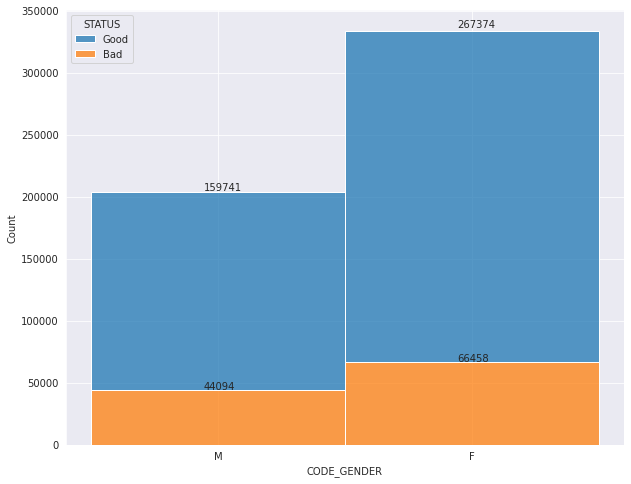

In [22]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,8))
aa = sns.histplot(data=df,x="CODE_GENDER",hue="STATUS",multiple="stack")

for aa in aa.patches[-8:]:
    ax.annotate(
        f"{int(aa.get_height())}",
        (aa.get_x() + (aa.get_width()/2.25),aa.get_y()+aa.get_height()+(aa.get_height()*0.01))
               )
plt.show()

## Análise Renda Anual
---
A renda anual não mostra ser até o momento um fator que influencie na aprovação do crédito ao observar o gráfico dos créditos aprovados e os não aprovados. Ressalta-se que o dentro dos aprovados há os que atrasaram o pagamento e a quantidade demonstra haverem mais aprovações porém a distribuição da renda anual assemelha-se ao do negado. 

In [25]:
negado = df[df.STATUS == "Bad"]
aprovado = df.drop(negado.index).copy()
aprovado.drop_duplicates(inplace=True)

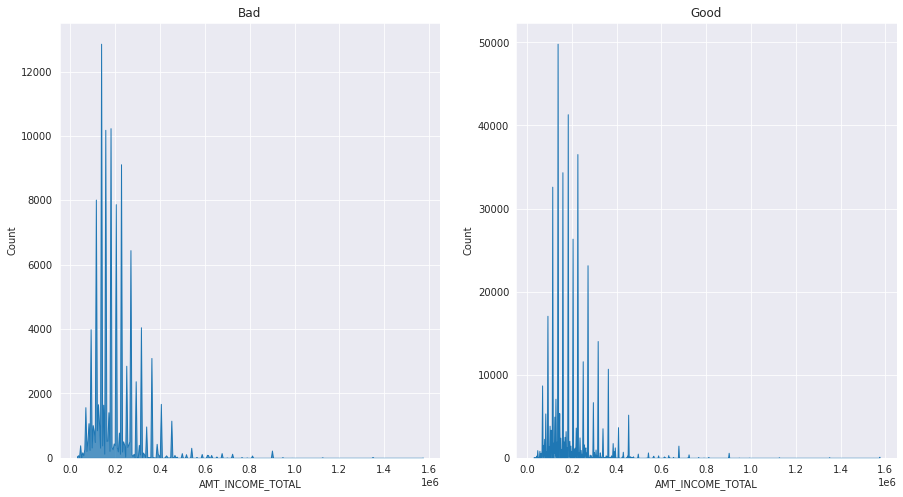

In [27]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.histplot(data=negado,x="AMT_INCOME_TOTAL",element="poly",ax=ax[0])
sns.histplot(data=aprovado,x="AMT_INCOME_TOTAL",element="poly",ax=ax[1])

ax[0].set_title("Bad")
ax[1].set_title("Good")
plt.show()

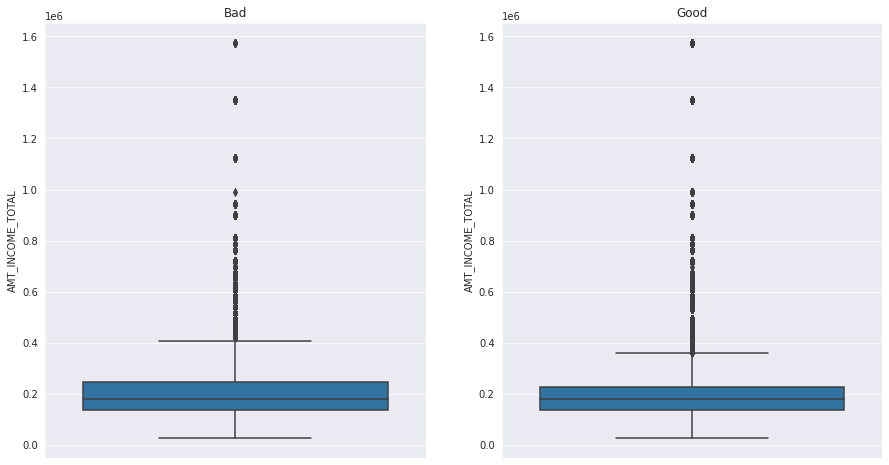

In [28]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(data=negado,y="AMT_INCOME_TOTAL",ax=ax[0])
sns.boxplot(data=aprovado,y="AMT_INCOME_TOTAL",ax=ax[1])

ax[0].set_title("Bad")
ax[1].set_title("Good")
plt.show()

<br>

## Análise tipo de educação e ocupação
---

Trabalhadores em geral são os que mais solicitam o empréstimo pelo banco de acordo com o gráfico construído com base nos dados. Além disso, há uma predominancia de clientes com grau acadêmico entre ensino fundamental incompleto e ensino médio completo que solicitam empréstimos. Pouco observa-se a presença de clientes com grau acadêmico universitário.

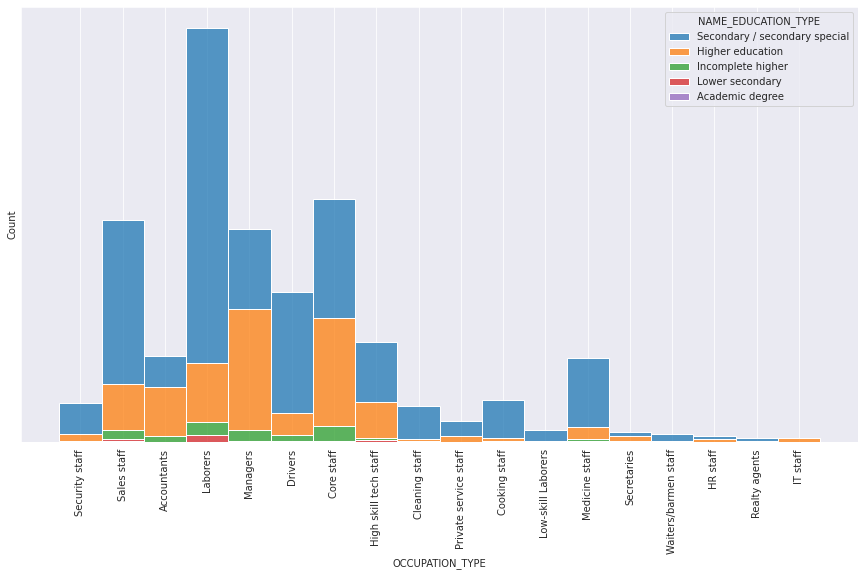

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=df,x="OCCUPATION_TYPE",hue="NAME_EDUCATION_TYPE",multiple="stack")

plt.xticks(rotation=90)
plt.yticks([])
plt.show()

<br>

## Análise quantidade de filhos
---

De acordo com o gráfico abaixo, a quantidade de filhos não apresenta uma correlação muito grande com o status do empréstimo feito. Uma análise que consegue ser retirada é que clientes com mais de 4 filhos tendem a não terem emprétimos. 

In [30]:
def proporcao(i:int):
    if(i == 1):
        return 1
    else:
        return np.log(i) + 1

In [31]:
aa = df.groupby(["CNT_CHILDREN","STATUS"]).count()[["ID"]]
aa.reset_index(inplace=True)
aa.rename({"ID":'QTD'},inplace=True,axis=1)

aa["QTD"] = aa["QTD"].apply(lambda x: proporcao(x))

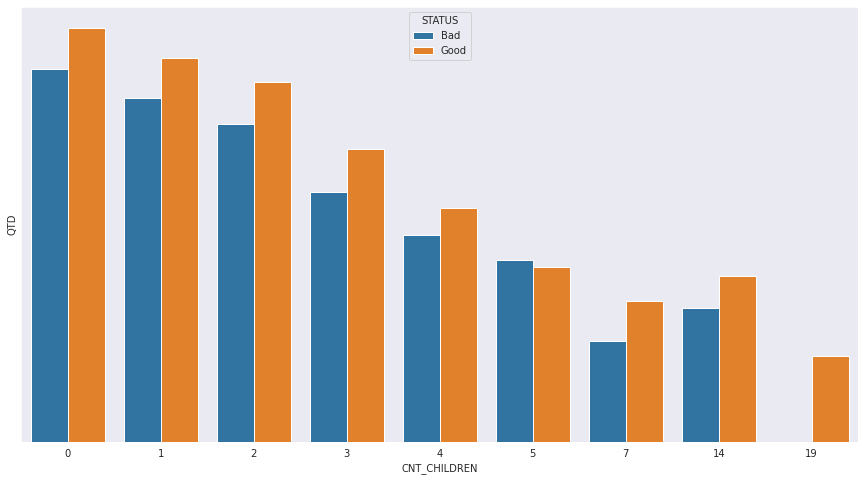

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=aa,x="CNT_CHILDREN",y="QTD",hue="STATUS")
plt.yticks([])
plt.show()

<br>

## Análise do status familiar
---

Grande parte dos clientes são pessoas casadas e que moram ou em apartamentos ou em casas. O gráfico abaixo mostra a proporção entre o status familiar e o tipo de residência.

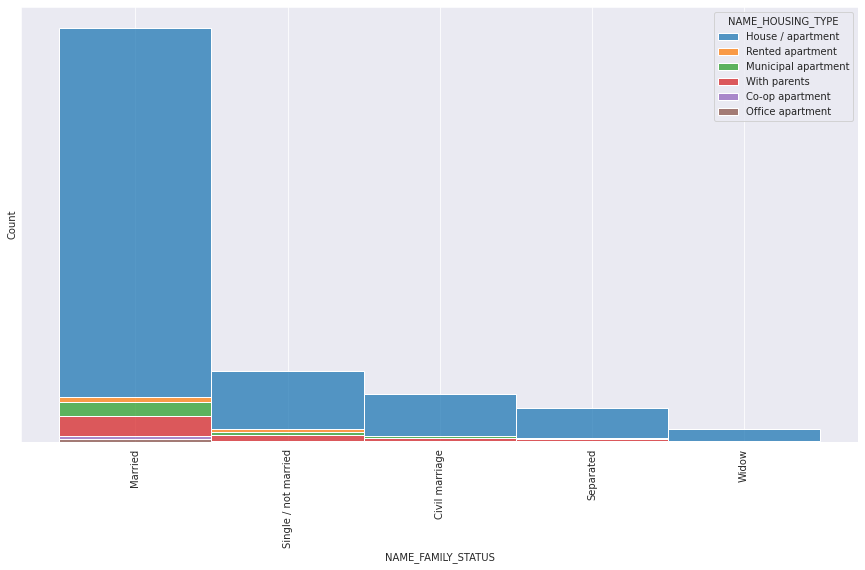

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=df,x="NAME_FAMILY_STATUS",hue="NAME_HOUSING_TYPE",multiple="stack")

plt.xticks(rotation=90)
plt.yticks([])
plt.show()

<br>

## Correlação entre as variáveis
---


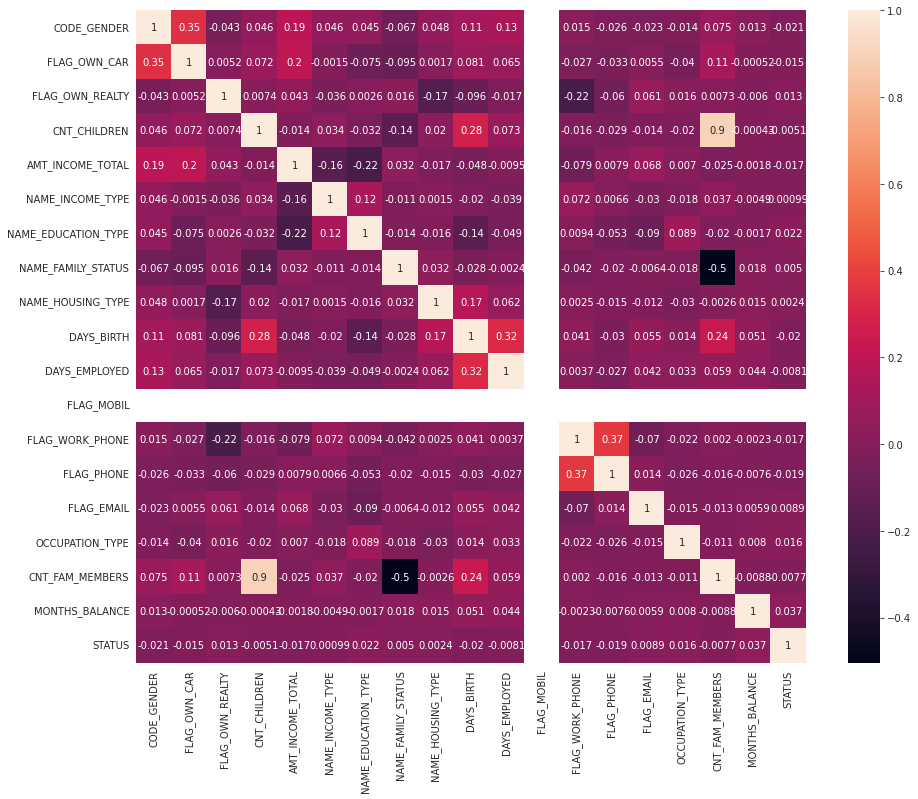

In [34]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

<h1 style="text-align: center">. . .</h1>

<br>

# Aplicando Aprendizado de Máquina
---
A fim de aplicar o aprendizado de máquina, o <code>df_train</code> será utilizado para esta tarefa já que a conversão de seus valores para tipos númericos foram feitos. O objetivo é conseguir prever o <code>STATUS</code>, variável alvo, com base nas outras colunas do Data Frame, variáveis preditoras. Além disso para treinar os modelos será usado a técnica Hold-Out, ou seja, separar um conjunto para treino e teste e os mesmos conjuntos serão usados em todos os modelos para serem feitos comparações nas métricas Acurácia, Revocação e F1 Score.

In [35]:
y = df_train["STATUS"]
X = df_train.drop(["STATUS"],axis=1)

In [36]:
df_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,1.000000,1.0
1,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.983333,1.0
2,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.966667,1.0
3,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.950000,1.0
4,1.0,1.0,1.0,0.0,0.055233,4.0,4.0,1.0,1.0,0.183215,0.928835,0.0,0.0,0.0,0.0,16.0,0.052632,0.933333,1.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

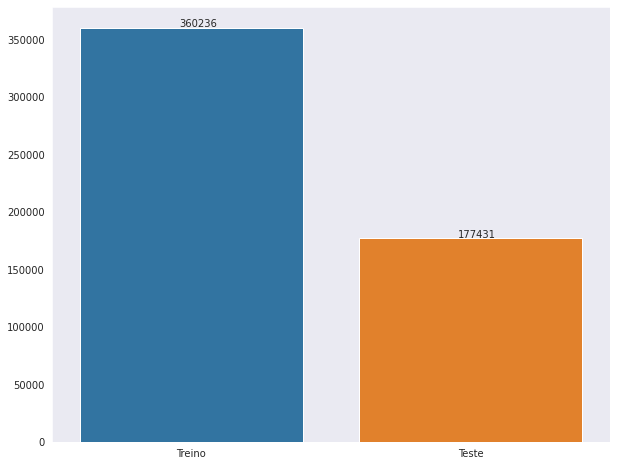

In [22]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10,8))
bar = sns.barplot(x=["Treino","Teste"],y=[X_train.shape[0],X_test.shape[0]],ax=ax)
for i in bar.patches:
    ax.annotate(
        int(i.get_height()),
        (i.get_x()+(i.get_width()/2.25),i.get_height()+(i.get_height()*0.0025))
    )
plt.show()

<br>
<p style="text-align: center;">
    <strong>Armazenamento dos resultados finais</strong>
</p>
<br>

In [23]:
resultados = []

<br>
<p style="text-align: center;">
    <strong>Definindo função para treino</strong>
</p>
<br>

In [24]:
def train_model(clf,name):
    clf.fit(X_train,y_train)
    predict = clf.predict(X_test)
    
    acc = accuracy_score(y_test, predict)
    rec = recall_score(y_test, predict,average="macro")
    f1 = f1_score(y_test, predict,average="macro")
    resultados.append([name,acc,rec,f1])
    
    print(pd.DataFrame({"Acuracia":[acc],"Revocacao":[rec],"F1 score":[f1]},index=[name]))
    
    fig, ax = plt.subplots(figsize=(10,7))
    sns.heatmap(
        pd.DataFrame(confusion_matrix(y_test, predict),
                     columns=ordinal_encoder.categories_[-1],
                     index=ordinal_encoder.categories_[-1]
                    ),
        annot=True,
        fmt='d',
        ax=ax)
    plt.show()

<br>

## Árvore de Decisão
---

                   Acuracia  Revocacao  F1 score
Arvore de Decisao  0.791226   0.690543  0.686514


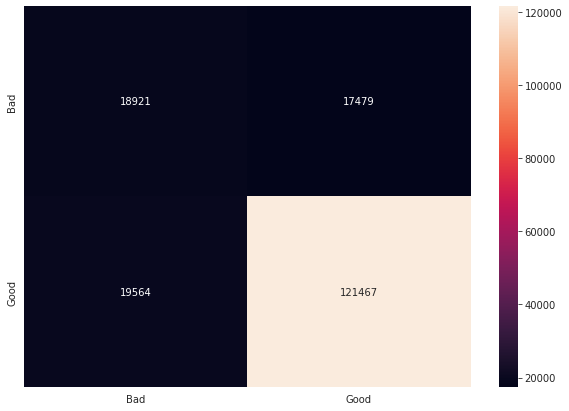

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
train_model(dtc,"Arvore de Decisao")

<br>

## Floresta Randômicas
---

                     Acuracia  Revocacao  F1 score
Floresta Randomicas  0.813533    0.68669  0.697074


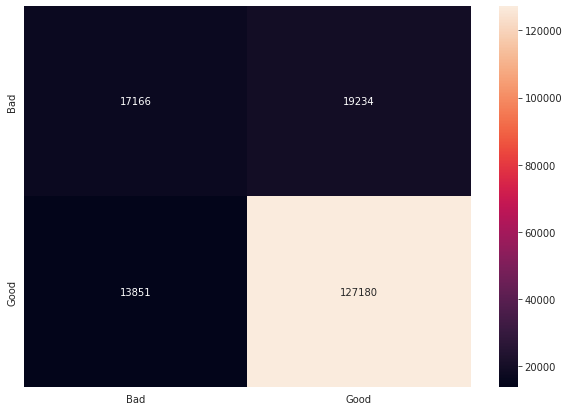

In [26]:
rfc = RandomForestClassifier(random_state=42)
train_model(rfc,"Floresta Randomicas")

<br>

## Naive Bayes
---

             Acuracia  Revocacao  F1 score
Naive Bayes  0.794703   0.500101  0.443319


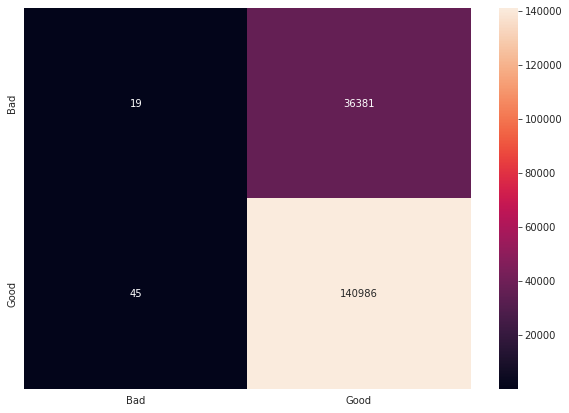

In [27]:
nbc = GaussianNB()
train_model(nbc,"Naive Bayes")

<br>

## K-Vizinhos Próximos
---

                     Acuracia  Revocacao  F1 score
K-Vizinhos Proximos  0.836404   0.703788   0.72296


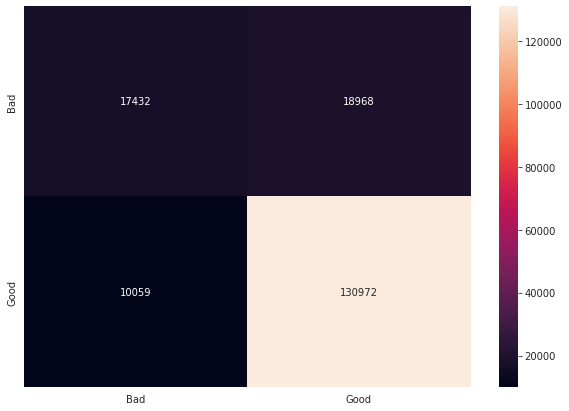

In [28]:
knn = KNeighborsClassifier()
train_model(knn,"K-Vizinhos Proximos")

<br>

## Regressão Logística
---

/home/lucas/anaconda3/envs/dfdc/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                     Acuracia  Revocacao  F1 score
Regressao Logistica   0.79485        0.5   0.44285


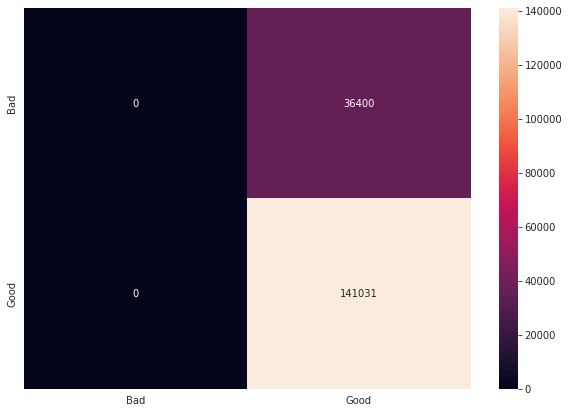

In [29]:
lrc = LogisticRegression(random_state=42)
train_model(lrc,"Regressao Logistica")

<br>
<p style="text-align: center;">
    <strong>Resultado treinamento</strong>
</p>
<br>

In [30]:
result_df = pd.DataFrame(resultados,columns=["Modelo","Acuracia","Revocacao","F1 Score"])
result_df

,Modelo,Acuracia,Revocacao,F1 Score
0,Arvore de Decisao,0.791226,0.690543,0.686514
1,Floresta Randomicas,0.813533,0.686690,0.697074
2,Naive Bayes,0.794703,0.500101,0.443319
3,K-Vizinhos Proximos,0.836404,0.703788,0.722960
4,Regressao Logistica,0.794850,0.500000,0.442850


<br>
<p style="text-align: center;">
    <strong>Salvando métricas</strong>
</p>
<br>

In [31]:
result_df.to_csv("./metricas.csv",index=False)

<br>

# Melhor modelo
---
De acordo com a tabela contendo as métricas, o melhor modelo foi o K-Vizinhos Próximos.

<br>
<p style="text-align: center;">
    <strong>Salvando o modelo</strong>
</p>
<br>

In [32]:
import pickle

with open("model.pkl","wb+") as f:
    pickle.dump(knn,f)